In [1]:
from processing.utils import *
from processing.utils2 import *
from processing.utils3 import *
from processing.gpcrdb_soup import *
from processing.download import *
from processing.processor import *
from processing.df_to_cif import *
from processing.bondtypes import *
from processing.affinities import *
from analysis.analysis import *


from torch_geometric.data import Data
import numpy as np
import torch
from scipy.spatial.distance import cdist, pdist
from tqdm import trange

In [2]:
# Filtering etc is done with the processor!

In [3]:
p = CifProcessor()

In [4]:
p.read_pkl_metainfo()

In [5]:
p.table

,uniprot(gene),receptor family,Cl.,Species,Method,PDB,Resolution,Preferred Chain,State,Degree active %,Family,Subtype,Function
0,STE2,STE2,D1(Ste2-likefungalpheromone),strainATCC204508/S288c,cryo-EM,7AD3,3.5,A,Active,-,GPa1family,αPa1,Agonist
1,OPRM,Opioid,A(Rhodopsin),Mouse,X-ray,4DKL,2.8,A,Inactive,7,-,-,Antagonist
2,OXYR,Vasopressinandoxytocin,A(Rhodopsin),Human,X-ray,6TPK,3.2,A,Inactive,24,-,-,Antagonist
3,CCR2,Chemokine,A(Rhodopsin),Human,X-ray,5T1A,2.8,A,Inactive,30,-,-,AllostericantagonistAntagonist
4,CNR2,Cannabinoid,A(Rhodopsin),Human,X-ray,5ZTY,2.8,A,Inactive,6,-,-,Antagonist
...,...,...,...,...,...,...,...,...,...,...,...,...,...
552,NPY2R,NeuropeptideY,A(Rhodopsin),Human,X-ray,7DDZ,2.8,A,Inactive,1,-,-,Antagonist
553,NTR1,Neurotensin,A(Rhodopsin),Rat,cryo-EM,7L0P,4.1,C,Active,100,Gi/o,αi1,Agonist
554,ADA2C,Adrenoceptors,A(Rhodopsin),Human,X-ray,6KUW,2.8,A,Inactive,1,-,-,Antagonist
555,NTR1,Neurotensin,A(Rhodopsin),Rat,cryo-EM,7L0Q,4.3,C,Active,100,Gi/o,αi1,Agonist


In [6]:
p.read_pkl(mode='r', folder='data/processed/')

  3%|███▎                                                                                                              | 16/557 [00:00<00:03, 159.96it/s]

Reading files with generic numbers on receptors.


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 557/557 [00:03<00:00, 142.10it/s]


In [7]:
p.dfl[0]

,PDB,group_PDB,auth_asym_id,label_asym_id,label_seq_id,auth_seq_id,label_comp_id,id,label_atom_id,type_symbol,...,phi,omega,psi,identifier,label_comp_sid,label_2_uni,gen_pos,gen_pos1,gen_pos2,uniprot_comp_sid
0,1f88,ATOM,A,A,1,1,MET,1,N,N,...,NaN,-179.718577,133.146625,OPSD_BOVIN,M,0,,0.0,0.0,
1,1f88,ATOM,A,A,1,1,MET,2,CA,C,...,NaN,-179.718577,133.146625,OPSD_BOVIN,M,1,,0.0,0.0,
2,1f88,ATOM,A,A,1,1,MET,3,C,C,...,NaN,-179.718577,133.146625,OPSD_BOVIN,M,0,,0.0,0.0,
3,1f88,ATOM,A,A,1,1,MET,4,O,O,...,NaN,-179.718577,133.146625,OPSD_BOVIN,M,0,,0.0,0.0,
4,1f88,ATOM,A,A,1,1,MET,5,CB,C,...,NaN,-179.718577,133.146625,OPSD_BOVIN,M,0,,0.0,0.0,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5062,1f88,ATOM,B,B,326,326,ASN,5063,O,O,...,-55.581159,NaN,NaN,OPSD_BOVIN,N,0,,0.0,0.0,
5063,1f88,ATOM,B,B,326,326,ASN,5064,CB,C,...,-55.581159,NaN,NaN,OPSD_BOVIN,N,0,,0.0,0.0,
5064,1f88,ATOM,B,B,326,326,ASN,5065,CG,C,...,-55.581159,NaN,NaN,OPSD_BOVIN,N,0,,0.0,0.0,
5065,1f88,ATOM,B,B,326,326,ASN,5066,OD1,O,...,-55.581159,NaN,NaN,OPSD_BOVIN,N,0,,0.0,0.0,


In [8]:
BOND_TYPE_DF

,H,N,C,O,S
H,0,1,2,3,4
N,1,5,6,7,8
C,2,6,9,10,11
O,3,7,10,12,13
S,4,8,11,13,14


In [9]:
FULL_ATOM_LIST = list(p.dfl[0]['label_atom_id'].unique())

In [64]:
class GraphProcessor:
    def __init__(self,
                 d: list,
                 p: CifProcessor,
                 label_type = 'Log(Emax/EC50)'):
        self.d = d
        self.p = p
        self.allow_exception=False
        
        self.simplified = False
        if 'generic_position' in list(p.dfl[0].columns):
            self.simplified=True
        
        self.atom_list = FULL_ATOM_LIST
        self.edge_criteria = ['self', 'distance']
        self.edge_features = ['unitary', 'distance', 'EM']
        self.node_criteria = ['H5']
        
        self.assign_labels(label_type=label_type)
    
    # ================================================================================================================
    
    def simplify(self):
        if not self.simplified:
            for i in trange(len(self.p.dfl)):
                if self.allow_exception:
                    try:
                        df = self.p.dfl[i]
                        self.p.dfl[i] = pd.DataFrame()
                        self.p.dfl[i] = self._simplify_gen_pos(df).reset_index()
                    except:
                        pass
                else:
                    df = self.p.dfl[i]
                    self.p.dfl[i] = pd.DataFrame()
                    self.p.dfl[i] = self._simplify_gen_pos(df).reset_index()
                self.simplified = True
        else:
            pass
        
    def _simplify_gen_pos(self, df):
        def sgp(gen_pos='', gprot_pos=''):
            if gprot_pos != '':
                return gprot_pos
            else:
                return gen_pos.split('x')[0]
        cols = list(df.columns)
        if ('gen_pos' in cols) and ('gprot_pos' in cols):
            df['generic_position'] = df.apply(lambda x: sgp(x.gen_pos, x.gprot_pos), axis=1)
            df.drop(['group_PDB', 'label_seq_id', 'label_asym_id',
                    'auth_seq_id', 'id',
                    'phi', 'omega', 'psi', 'label_comp_id',
                    'label_2_uni', 'gen_pos', 'gen_pos1', 'gen_pos2', 'gprot_pos',
                    'uniprot_comp_id', 'fam_comp_id', 'uniprot_comp_sid'], axis=1, inplace=True)
            return df
        elif 'gen_pos' in cols:
            df['generic_position'] = df.apply(lambda x: sgp(x.gen_pos), axis=1)
            df.drop(['group_PDB', 'label_seq_id','label_asym_id',
                   'auth_seq_id', 'id',
                   'phi', 'omega', 'psi','label_comp_id',
                   'label_2_uni', 'gen_pos', 'gen_pos1', 'gen_pos2',
                   'uniprot_comp_sid'], axis=1, inplace=True)
            return df
        else:
            df['generic_position'] = ''
            df.drop(['group_PDB', 'label_seq_id','label_asym_id',
                   'auth_seq_id', 'id','label_comp_id',
                   'phi', 'omega', 'psi'], axis=1, inplace=True)   
            return df
        
    # ================================================================================================================
    
    def assign_labels(self, label_type = 'Log(Emax/EC50)'):
        A = AffinityProcessor(setting='families')
        A.set_label_type(label_type)
        A.set_group()
        prev_len = len(self.p.table)
        print("Filtering out samples with no associated affinity value...")
        self.p = filter_valid_pdbs_with_affinities(self.p, A)
        print("Retaining {} / {} samples!".format(len(self.p.table), prev_len))
        label_df = make_label_df(self.p, A, label_type)
        self.p.table = pd.merge(self.p.table, label_df, on='PDB')
    
    # ================================================================================================================
    
    def set_atom_list(self, filtered_atom_list=['CA']):
        self.atom_list = filtered_atom_list
        print("Set atom_list to {}.".format(self.atom_list))
    
    def apply_atom_list_filter(self):
        for i in range(len(self.p.dfl)):
            p.dfl[i] = p.dfl[i][p.dfl[i]['label_atom_id'].isin(self.atom_list)]
        print("Filtered p by atom_list.")
        
    # ================================================================================================================
    
    def create_graph(self, 
                     filter_by_chain=True,
                     gpcr=True,
                     gprotein=True,
                     auxilary=True,
                     node_criteria='H5', 
                     edge_criteria='radius',
                     h5start=13,
                     cons_r_res=['1.50', '3.50', '7.53'],
                     radius=12,
                     max_edge_dist=7):
        if node_criteria!=None:
            self.node_criteria = node_criteria
        self.selection = []
        self.edges = []
        self.edge_attrs = []
        for i in trange(len(self.p.dfl)):
            # INITIALIZATION
            df = self.p.dfl[i]
            self._select_edge_criterion()
            self._select_edge_features()
            self._select_node_criterion()
            # NODE SELECTION
            df_idxs = self._get_selection(df,
                                          filter_by_chain=filter_by_chain,
                                          gpcr=gpcr,
                                          gprotein=gprotein,
                                          auxilary=auxilary,
                                          h5start=h5start,
                                          cons_r_res=cons_r_res,
                                          radius=radius)
            df_sele = self._filter_by_index_list(df, df_idxs)
            if len(df_sele) > 0:
                self.selection.append(df_sele)
                # EDGES: LIST
                edges = self._create_edge_list(df=df_sele, max_edge_dist=max_edge_dist)
                self.edges.append(edges)
                # EDGES: ATTRIBUTES
                edge_attr = self._get_edge_features(df_sele, edges, max_edge_dist)
                self.edge_attrs.append(edge_attr)
                y = self._get_label(df['PDB'].iloc[0])
                # Todo: get the node features (Z or atom-label (or both))
                x = df_sele.apply(lambda x: RES_DICT[x.label_comp_sid], axis=1).to_numpy().astype(np.int8)
                pos = df_sele[['Cartn_x', 'Cartn_y', 'Cartn_z']].to_numpy().astype(float)
                gp.d.append(self._get_data_object(x, edges, edge_attr, y, pos))
                print('\n\n\n')
            
            
    # ----------------------------------------------------------------------------------------------------------------
    
    def _select_edge_criterion(self, edge_criteria=[], edge_crit_dist=5):
        if not isinstance(edge_criteria, list):
            edge_criteria = [edge_criteria]
        if len(edge_criteria) > 0:
            self.edge_criteria = edge_criteria
        print("Selected edge criterion:", self.edge_criteria)
    
    def _select_edge_features(self, edge_features=[]):
        if not isinstance(edge_features, list):
            edge_features = [edge_features]
        if len(edge_features) > 0:
            self.edge_features = edge_features
        print("Selected edge features:", self.edge_features)
        
    def _select_node_criterion(self, node_criteria=[]):
        if not isinstance(node_criteria, list):
            node_criteria = [node_criteria]
        if len(node_criteria) > 0:
            self.node_criteria = node_criteria
        print("Selected criterion for node selection:", self.node_criteria)
              
    # ----------------------------------------------------------------------------------------------------------------
    
    def _get_selection(self, 
                       df: pd.DataFrame,
                       filter_by_chain,
                       gpcr,
                       gprotein,
                       auxilary,
                       h5start,
                       cons_r_res,
                       radius):
        # get a list of nodes (you can have multiple criterions met at the same time...)
        df.reset_index(inplace=True, drop=True)
        valid = []  # indices filtered by chain
        idxs = []  # list of selected nodes
        df_idxs = []  # list of selected nodes filtered by chain
        
        if filter_by_chain:
            print("Filtering by chain!")
            if gpcr:
                print("Adding gpcr to selection!")
                a = len(valid)
                valid += self._get_gpcr(df)
                print("Number valid gpcr atoms:", len(valid)-a)
            if gprotein:
                print("Adding gprotein to selection!")
                a = len(valid)
                valid += self._get_gprotein(df)
                print("Number valid gprotein atoms:", len(valid)-a)
            if auxilary:
                print("Adding auxilary chains to selection!")
                a = len(valid)
                valid += self._get_auxilary(df)
                print("Number valid auxilary atoms:", len(valid)-a)
        else:
            valid = list(df.index)
        valid = list(set(valid))
        print("In total using {} valid atoms!".format(len(valid)))
        
        if len(valid) >= 0:
            if 'H5' in self.node_criteria:
                print("Searching nodes meeting H5 criterion...")
                idxs += self._get_h5(df, h5start, radius)
            if 'Interaction Surface' in self.node_criteria:
                print("Searching nodes in the interaction surface...")
                idxs += self._get_interaction_surface(df)
            if 'Interaction Site' in self.node_criteria:
                print("Searching nodes in the interaction site...")
                idxs += self._get_interaction_site(df, cons_r_res=['1.50', '3.50', '7.53'], radius=radius)
            for idx in idxs:
                if idx in valid:
                    df_idxs.append(idx)
            return df_idxs
        else:
            print("No valid nodes found!")
            return []
    
    def _get_gpcr(self, df):
        # list(df.index)
        some_gen_pos = ['3.50', '6.50', '7.50']
        df_sgp = df[df['generic_position'].isin(some_gen_pos)]
        if len(df_sgp) > 0:
            gpcr_chain = df_sgp.iloc[0]['auth_asym_id']
            return list(df[df['auth_asym_id'].str.contains(gpcr_chain)].index)
        else:
            return []
    
    def _get_gprotein(self, df):
        # any chain with labels that mark it as a gprotein ~ i.e. generic residue number of said chain contains 'G.'
        df_gp = df[df['generic_position'].str.contains('G.')]
        if len(df_gp) > 0:
            gprot_chain = df_gp.iloc[0]['auth_asym_id']
            return list(df[df['auth_asym_id'].str.contains(gpcr_chain)].index)
        else:
            return []
        
    def _get_auxilary(self, df):
        # any chain with labels that mark it as a gprotein ~ i.e. generic residue number of said chain contains 'G.'
        chain_df = df.groupby('auth_asym_id')['generic_position'].nunique()
        chains = list(chain_df[chain_df==1].index)
        if len(chains) > 0:
            auxilary_df = df[df['auth_asym_id'].isin(chains)]
            return list(auxilary_df.index)
        else:
            return []
    
    def _get_h5(self, df, h5start, h5radius):
        # any chain with 
        print("Checking for nodes within H5 radius:", h5radius)
        strs = ['G.H5.' + str(x) for x in range(27) if ((x >= h5start) & (x <= 26))]
        df_h5 = df[df['generic_position'].isin(strs)]
        xyz_h5 = df_h5[['Cartn_x', 'Cartn_y', 'Cartn_z']].to_numpy().astype(float)
        if len(xyz_h5) > 0:
            xyz_full = df[['Cartn_x', 'Cartn_y', 'Cartn_z']].to_numpy().astype(float)
            D = cdist(xyz_full, xyz_h5).T
            h5_list = []
            for p in range(D.shape[1]):
                if np.any(D[:, p] < h5radius):
                    h5_list.append(p)
            return h5_list
        else:
            return []
    
    def _get_interaction_surface(self, df, max_dist=7, n_neighbor_res=2):
        pass
    
    def _get_interaction_site(self, df, cons_r_res, radius):
        print("getting interaction site")
        int_site_corners = df[df['generic_position'].isin(cons_r_res)]
        if len(int_site_corners) == len(cons_r_res):
            xyz_corners = int_site_corners[['Cartn_x', 'Cartn_y', 'Cartn_z']].astype(float).to_numpy().mean(axis=1)
            xyz_full = df[['Cartn_x', 'Cartn_y', 'Cartn_z']].to_numpy().astype(float)
            D = cdist(xyz_full, xyz_corners[None,:]).T
            h5_list = []
            for p in range(D.shape[1]):
                if np.any(D[:, p] < radius):
                    h5_list.append(p)
            return h5_list
        else:
            return []
    
    def _filter_by_index_list(self, df, df_idxs):
        if len(df_idxs) > 0:
            filtered = df.loc[df.index[df_idxs]].reset_index(drop=True)
            return filtered
        else:
            return pd.DataFrame()
    
    # ----------------------------------------------------------------------------------------------------------------
    
    def _create_edge_list(self, 
                          df: pd.DataFrame,
                          max_edge_dist=7,
                          ):
        """
        Return a list of shape (2, number_of_edges)
        """
        edge_list = []
        if 'residual' in self.edge_criteria:
            # add connection between all atoms within the same residue
            pass
        if 'EM' in self.edge_criteria:
            pass
        if 'distance' in self.edge_criteria:
            xyz = df[['Cartn_x', 'Cartn_y', 'Cartn_z']].to_numpy().astype(float)
            D = cdist(xyz, xyz, 'euclidean')
            edge_dist_list = []
            for pi in range(D.shape[0]):
                if 'self' not in self.edge_criteria:
                    for pj in range(D.shape[1]):
                        D[i, i] = max_edge_dist + 1  # this removes all self interactions
                edges = np.where(D[:, pi] <= max_edge_dist)[0].tolist()
                for e in edges:
                    edge_dist_list.append((pi, e))
            edge_list += edge_dist_list
        elif 'self' in self.edge_criteria:
            # each node interacts with itself
            idxs = list(df.index)
            self_interactions = [(x, x) for x in idxs]
            edge_list += self_interactions
        return edge_list
        
        
    def _get_em_dist(self,
                     xyz1,
                     z1,
                     xyz2,
                     z2
                    ):
        em_dists = []
        # z1 * z2 / (dist^6)
        return em_dists
        
    # ----------------------------------------------------------------------------------------------------------------
        
    def _get_edge_features(self, df, edge_list, max_edge_dist):
        # unitary? --> 1 (for every edge)
        edge_features = []
        for _, (i, j) in enumerate(edge_list):
            features = []
            xyzi = df.iloc[i][['Cartn_x', 'Cartn_y', 'Cartn_z']].to_numpy().astype(float)
            xyzj = df.iloc[j][['Cartn_x', 'Cartn_y', 'Cartn_z']].to_numpy().astype(float)
            if 'unitary' in self.edge_features:
                features += [1]
            # distance? --> (euclidean distance)
            if 'distance' in self.edge_features:
                dist = np.linalg.norm(xyzi-xyzj)
                features += [dist / max_edge_dist]
            # EM?  --> z1 * z2 / r^6
            if 'em' in self.edge_features:
                # xyzi = df.iloc[i][]
                # xyzj = df.iloc[j][]
                features +=  [0]
            # atom-atom-interaction as a class (that we can embed)?
            if 'bond_embedding' in self.edge_features:
                features += [0]
            edge_features.append(features)
        return edge_features
              
    # ----------------------------------------------------------------------------------------------------------------

    def _get_label(self, pdb_id):
        return self.p.table[self.p.table['PDB']==pdb_id].iloc[0][['Gs','Gi/o','Gq/11','G12/13']]
              
    # ----------------------------------------------------------------------------------------------------------------
    
    def _get_data_object(self, x, edge_index, edge_attr, y, pos):
        """
        Input:
        data.x: Node feature matrix with shape [num_nodes, num_node_features]
        data.edge_index: Graph connectivity in COO format with shape [2, num_edges] and type torch.long
        data.edge_attr: Edge feature matrix with shape [num_edges, num_edge_features]
        data.y: Target to train against (may have arbitrary shape), e.g., node-level targets of shape [num_nodes, *] or graph-level targets of shape [1, *]
        data.pos: Node position matrix with shape [num_nodes, num_dimensions]
        """
        x = torch.tensor(x, dtype=torch.long)
        edge_index = torch.tensor(edge_index, dtype=torch.long)
        edge_attr = torch.tensor(edge_attr, dtype=torch.float)
        y = torch.tensor(y, dtype=torch.float)
        pos = torch.tensor(pos, dtype=torch.float)
        return Data(x=x, edge_index=edge_index.T, edge_attr=edge_attr, y=y, pos=pos)
    
    # ================================================================================================================

In [65]:
# add gpcr/gprteotein as label

In [66]:
del gp

In [69]:
gp = GraphProcessor(d=[], p=p)

Reading data from data/couplings/families_coupling.xls!


C:\Users\Sideadmin\.conda\envs\mt\lib\site-packages\pandas\core\generic.py:4152: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


Initialized Affinity Processor!
Please set a group --------------  ['GPCRdb', 'Inoue', 'Bouvier'].
please set label type -----------  ['Guide to Pharmacology', 'Log(Emax/EC50)', 'pEC50', 'Emax'].

Selected label type 'Log(Emax/EC50)'.


Selected data of group 'GPCRdb'.

Filtering out samples with no associated affinity value...
Retaining 368 / 368 samples!


In [70]:
gp.p.table

,uniprot(gene),receptor family,Cl.,Species,Method,PDB,Resolution,Preferred Chain,State,Degree active %,...,Gq/11_x,G12/13_x,Gs_y,Gi/o_y,Gq/11_y,G12/13_y,Gs,Gi/o,Gq/11,G12/13
0,OXYR,Vasopressinandoxytocin,A(Rhodopsin),Human,X-ray,6TPK,3.2,A,Inactive,24,...,8.3,0.0,0.0,7.2,8.3,0.0,0.0,7.2,8.3,0.0
1,CNR2,Cannabinoid,A(Rhodopsin),Human,X-ray,5ZTY,2.8,A,Inactive,6,...,0.0,0.0,0.0,8.9,0.0,0.0,0.0,8.9,0.0,0.0
2,PE2R3,Prostanoid,A(Rhodopsin),Human,X-ray,6AK3,2.9,B,Active,83,...,8.7,10.0,0.0,9.8,8.7,10.0,0.0,9.8,8.7,10.0
3,5HT1B,5-Hydroxytryptamine,A(Rhodopsin),Human,cryo-EM,6G79,3.8,S,Active,100,...,6.7,0.0,0.0,8.9,6.7,0.0,0.0,8.9,6.7,0.0
4,OPRD,Opioid,A(Rhodopsin),Human,X-ray,4N6H,1.8,A,Inactive,7,...,7.9,0.0,0.0,9.7,7.9,0.0,0.0,9.7,7.9,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
363,CCKAR,Cholecystokinin,A(Rhodopsin),Human,cryo-EM,7MBX,2.0,R,Active,100,...,11.1,10.4,10.4,11.0,11.1,10.4,10.4,11.0,11.1,10.4
364,GLP1R,Glucagon,B1(Secretin),Human,cryo-EM,7LCJ,2.8,R,Active,100,...,0.0,0.0,10.6,0.0,0.0,0.0,10.6,0.0,0.0,0.0
365,ADA2A,Adrenoceptors,A(Rhodopsin),Human,X-ray,6KUX,2.7,A,Inactive,1,...,6.2,6.3,5.4,9.5,6.2,6.3,5.4,9.5,6.2,6.3
366,GLP1R,Glucagon,B1(Secretin),Human,cryo-EM,7LCK,3.2,R,Active,100,...,0.0,0.0,10.6,0.0,0.0,0.0,10.6,0.0,0.0,0.0


In [71]:
gp.set_atom_list()
gp.apply_atom_list_filter()

Set atom_list to ['CA'].
Filtered p by atom_list.


In [72]:
gp.simplify()

In [73]:
eg = gp.p.dfl[0]

In [74]:
x = eg.groupby('auth_asym_id')['generic_position'].nunique()

In [75]:
list(x[x==1].index)

['H', 'L']

In [76]:
eg[eg['generic_position'] != '']

,index,PDB,auth_asym_id,label_atom_id,type_symbol,Cartn_x,Cartn_y,Cartn_z,identifier,label_comp_sid,generic_position
0,1,2R4R,A,CA,C,11.554,38.126,29.950,ADRB2_HUMAN,G,1.36
1,5,2R4R,A,CA,C,12.440,34.492,30.621,ADRB2_HUMAN,I,1.37
2,13,2R4R,A,CA,C,15.679,35.525,28.918,ADRB2_HUMAN,V,1.38
3,18,2R4R,A,CA,C,16.371,38.398,31.315,ADRB2_HUMAN,M,1.39
4,23,2R4R,A,CA,C,15.823,35.947,34.181,ADRB2_HUMAN,S,1.40
...,...,...,...,...,...,...,...,...,...,...,...
204,1514,2R4R,A,CA,C,37.484,35.712,41.431,ADRB2_HUMAN,Q,8.55
205,1523,2R4R,A,CA,C,40.023,33.349,42.973,ADRB2_HUMAN,E,8.56
206,1532,2R4R,A,CA,C,37.833,32.757,46.035,ADRB2_HUMAN,L,8.57
207,1540,2R4R,A,CA,C,35.902,30.369,43.791,ADRB2_HUMAN,L,8.58


In [77]:
gp.create_graph(filter_by_chain=True,
                gpcr=True,
                gprotein=False,
                auxilary=False,
                node_criteria='Interaction Site', 
                edge_criteria='radius',
                h5start=13,
                cons_r_res=['1.50', '3.50', '7.53'], 
                radius=12,
                max_edge_dist=7)

  0%|▎                                                                                                                   | 1/368 [00:00<00:55,  6.56it/s]

Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 216
In total using 216 valid atoms!
Searching nodes in the interaction site...
getting interaction site




Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 216
In total using 216 valid atoms!
Searching nodes in the interaction site...
getting interaction site


  2%|█▉                                                                                                                  | 6/368 [00:00<00:20, 17.65it/s]





Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 442
In total using 442 valid atoms!
Searching nodes in the interaction site...
getting interaction site
Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 309
In total using 309 valid atoms!
Searching nodes in the interaction site...
getting interaction site
Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 315
In total using 315 valid atoms!
Searching nodes in the interaction site...
getting interaction site





  2%|██▌                                                                                                                 | 8/368 [00:00<00:28, 12.49it/s]





Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 222
In total using 222 valid atoms!
Searching nodes in the interaction site...
getting interaction site




Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 439
In total using 439 valid atoms!
Searching nodes in the interaction site...
getting interaction site


  3%|███▏                                                                                                               | 10/368 [00:00<00:27, 13.01it/s]





Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 439
In total using 439 valid atoms!
Searching nodes in the interaction site...
getting interaction site




Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 439
In total using 439 valid atoms!
Searching nodes in the interaction site...
getting interaction site




Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 467
In total using 467 valid atoms!
Searching nodes in the interaction site...
getting interaction 

  4%|█████                                                                                                              | 16/368 [00:01<00:22, 15.80it/s]





Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 284
In total using 284 valid atoms!
Searching nodes in the interaction site...
getting interaction site




Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 432
In total using 432 valid atoms!
Searching nodes in the interaction site...
getting interaction site


  5%|█████▋                                                                                                             | 18/368 [00:01<00:24, 14.30it/s]





Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 442
In total using 442 valid atoms!
Searching nodes in the interaction site...
getting interaction site




Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 291
In total using 291 valid atoms!
Searching nodes in the interaction site...
getting interaction site


  5%|██████▎                                                                                                            | 20/368 [00:01<00:31, 10.98it/s]





Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 444
In total using 444 valid atoms!
Searching nodes in the interaction site...
getting interaction site




Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 291
In total using 291 valid atoms!
Searching nodes in the interaction site...
getting interaction site


  6%|██████▉                                                                                                            | 22/368 [00:01<00:38,  9.07it/s]





Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 291
In total using 291 valid atoms!
Searching nodes in the interaction site...
getting interaction site
Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 428
In total using 428 valid atoms!
Searching nodes in the interaction site...
getting interaction site


  7%|███████▊                                                                                                           | 25/368 [00:02<00:38,  8.97it/s]





Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 443
In total using 443 valid atoms!
Searching nodes in the interaction site...
getting interaction site




Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 438
In total using 438 valid atoms!
Searching nodes in the interaction site...
getting interaction site


  7%|████████▏                                                                                                          | 26/368 [00:02<00:47,  7.13it/s]





Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 291
In total using 291 valid atoms!
Searching nodes in the interaction site...
getting interaction site


  8%|████████▊                                                                                                          | 28/368 [00:02<00:56,  6.04it/s]





Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 291
In total using 291 valid atoms!
Searching nodes in the interaction site...
getting interaction site




Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 442
In total using 442 valid atoms!
Searching nodes in the interaction site...
getting interaction site


  8%|█████████                                                                                                          | 29/368 [00:03<01:01,  5.51it/s]





Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 455
In total using 455 valid atoms!
Searching nodes in the interaction site...
getting interaction site


  8%|█████████▍                                                                                                         | 30/368 [00:03<01:05,  5.19it/s]





Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 297
In total using 297 valid atoms!
Searching nodes in the interaction site...
getting interaction site
Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 296
In total using 296 valid atoms!
Searching nodes in the interaction site...
getting interaction site
Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 443
In total using 443 valid atoms!
Searching nodes in the interaction site...
getting interaction site


 10%|███████████▌                                                                                                       | 37/368 [00:03<00:27, 12.05it/s]





Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 447
In total using 447 valid atoms!
Searching nodes in the interaction site...
getting interaction site
Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 278
In total using 278 valid atoms!
Searching nodes in the interaction site...
getting interaction site
Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 402
In total using 402 valid atoms!
Searching nodes in the interaction site...
getting interaction site





 11%|████████████▌                                                                                                      | 40/368 [00:03<00:21, 14.99it/s]

 379
In total using 379 valid atoms!
Searching nodes in the interaction site...
getting interaction site
Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 375
In total using 375 valid atoms!
Searching nodes in the interaction site...
getting interaction site




Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 248
In total using 248 valid atoms!
Searching nodes in the interaction site...
getting interaction site
Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 39

 12%|█████████████▍                                                                                                     | 43/368 [00:04<00:18, 17.13it/s]





Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 454
In total using 454 valid atoms!
Searching nodes in the interaction site...
getting interaction site




Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 454
In total using 454 valid atoms!
Searching nodes in the interaction site...
getting interaction site


 13%|██████████████▋                                                                                                    | 47/368 [00:04<00:21, 14.93it/s]





Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 346
In total using 346 valid atoms!
Searching nodes in the interaction site...
getting interaction site
Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 277
In total using 277 valid atoms!
Searching nodes in the interaction site...
getting interaction site




Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 275
In total using 275 valid atoms!
Searching nodes in the interaction site...
getting interaction site

 15%|████████████████▉                                                                                                  | 54/368 [00:04<00:18, 16.61it/s]





Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 369
In total using 369 valid atoms!
Searching nodes in the interaction site...
getting interaction site
Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 407
In total using 407 valid atoms!
Searching nodes in the interaction site...
getting interaction site




Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 437
In total using 437 valid atoms!
Searching nodes in the interaction site...
getting interaction site

 15%|█████████████████▌                                                                                                 | 56/368 [00:05<00:22, 13.57it/s]





Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 454
In total using 454 valid atoms!
Searching nodes in the interaction site...
getting interaction site




Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 391
In total using 391 valid atoms!
Searching nodes in the interaction site...
getting interaction site
Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 401
In total using 401 valid atoms!
Searching nodes in the interaction site...
getting interaction site

 17%|███████████████████▍                                                                                               | 62/368 [00:05<00:15, 20.12it/s]





Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 340
In total using 340 valid atoms!
Searching nodes in the interaction site...
getting interaction site




Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 346
In total using 346 valid atoms!
Searching nodes in the interaction site...
getting interaction site




Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 393
In total using 393 valid atoms!
Searching nodes in the interaction site...
getting interaction 

 18%|████████████████████▋                                                                                              | 66/368 [00:05<00:15, 19.61it/s]





Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 382
In total using 382 valid atoms!
Searching nodes in the interaction site...
getting interaction site




Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 382
In total using 382 valid atoms!
Searching nodes in the interaction site...
getting interaction site


 21%|████████████████████████▍                                                                                          | 78/368 [00:05<00:11, 26.24it/s]





Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 421
In total using 421 valid atoms!
Searching nodes in the interaction site...
getting interaction site
Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 503
In total using 503 valid atoms!
Searching nodes in the interaction site...
getting interaction site
Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 503
In total using 503 valid atoms!
Searching nodes in the interaction site...
getting interaction site
Sel

 23%|██████████████████████████▎                                                                                        | 84/368 [00:06<00:10, 28.23it/s]





Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 283
In total using 283 valid atoms!
Searching nodes in the interaction site...
getting interaction site




Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 452
In total using 452 valid atoms!
Searching nodes in the interaction site...
getting interaction site




Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 429
In total using 429 valid atoms!
Searching nodes in the interaction site...
getting interaction 

 24%|███████████████████████████▌                                                                                       | 88/368 [00:06<00:09, 28.02it/s]





Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 412
In total using 412 valid atoms!
Searching nodes in the interaction site...
getting interaction site
Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 419
In total using 419 valid atoms!
Searching nodes in the interaction site...
getting interaction site




Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 407
In total using 407 valid atoms!
Searching nodes in the interaction site...
getting interaction site

 28%|███████████████████████████████▉                                                                                  | 103/368 [00:06<00:07, 33.63it/s]





Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 401
In total using 401 valid atoms!
Searching nodes in the interaction site...
getting interaction site
Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 394
In total using 394 valid atoms!
Searching nodes in the interaction site...
getting interaction site
Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 388
In total using 388 valid atoms!
Searching nodes in the interaction site...
getting interaction site
Sel

 32%|████████████████████████████████████▌                                                                             | 118/368 [00:06<00:04, 55.75it/s]





Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 393
In total using 393 valid atoms!
Searching nodes in the interaction site...
getting interaction site
Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 389
In total using 389 valid atoms!
Searching nodes in the interaction site...
getting interaction site
Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 294
In total using 294 valid atoms!
Searching nodes in the interaction site...
getting interaction site
Sel

 34%|██████████████████████████████████████▋                                                                           | 125/368 [00:07<00:06, 36.40it/s]





Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 383
In total using 383 valid atoms!
Searching nodes in the interaction site...
getting interaction site
Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 390
In total using 390 valid atoms!
Searching nodes in the interaction site...
getting interaction site
Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 353
In total using 353 valid atoms!
Searching nodes in the interaction site...
getting interaction site
Sel

 36%|████████████████████████████████████████▌                                                                         | 131/368 [00:07<00:08, 28.28it/s]





Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 266
In total using 266 valid atoms!
Searching nodes in the interaction site...
getting interaction site




Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 382
In total using 382 valid atoms!
Searching nodes in the interaction site...
getting interaction site
Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 353
In total using 353 valid atoms!
Searching nodes in the interaction site...
getting interaction site

 37%|██████████████████████████████████████████▏                                                                       | 136/368 [00:07<00:09, 23.57it/s]





Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 441
In total using 441 valid atoms!
Searching nodes in the interaction site...
getting interaction site




Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 382
In total using 382 valid atoms!
Searching nodes in the interaction site...
getting interaction site
Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 388
In total using 388 valid atoms!
Searching nodes in the interaction site...
getting interaction site

 38%|███████████████████████████████████████████▎                                                                      | 140/368 [00:08<00:10, 20.82it/s]





Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 440
In total using 440 valid atoms!
Searching nodes in the interaction site...
getting interaction site




Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 430
In total using 430 valid atoms!
Searching nodes in the interaction site...
getting interaction site




Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 499
In total using 499 valid atoms!
Searching nodes in the interaction site...
getting interaction 

 42%|███████████████████████████████████████████████▋                                                                  | 154/368 [00:08<00:06, 33.82it/s]

 ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 496
In total using 496 valid atoms!
Searching nodes in the interaction site...
getting interaction site
Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 411
In total using 411 valid atoms!
Searching nodes in the interaction site...
getting interaction site
Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 431
In total using 431 valid atoms!
Searching nodes in the interaction site...
getting interaction site
Selected edge criterion: ['self

 43%|█████████████████████████████████████████████████▎                                                                | 159/368 [00:08<00:07, 28.74it/s]





Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 370
In total using 370 valid atoms!
Searching nodes in the interaction site...
getting interaction site
Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 370
In total using 370 valid atoms!
Searching nodes in the interaction site...
getting interaction site
Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 272
In total using 272 valid atoms!
Searching nodes in the interaction site...
getting interaction site
Sel

 45%|███████████████████████████████████████████████████                                                               | 165/368 [00:08<00:07, 28.80it/s]





Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 281
In total using 281 valid atoms!
Searching nodes in the interaction site...
getting interaction site
Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 378
In total using 378 valid atoms!
Searching nodes in the interaction site...
getting interaction site




Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 351
In total using 351 valid atoms!
Searching nodes in the interaction site...
getting interaction site

 46%|████████████████████████████████████████████████████▎                                                             | 169/368 [00:09<00:09, 20.28it/s]





Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 373
In total using 373 valid atoms!
Searching nodes in the interaction site...
getting interaction site
Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 370
In total using 370 valid atoms!
Searching nodes in the interaction site...
getting interaction site




Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 423
In total using 423 valid atoms!
Searching nodes in the interaction site...
getting interaction site

 47%|█████████████████████████████████████████████████████▎                                                            | 172/368 [00:09<00:12, 15.82it/s]





Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 288
In total using 288 valid atoms!
Searching nodes in the interaction site...
getting interaction site




Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 304
In total using 304 valid atoms!
Searching nodes in the interaction site...
getting interaction site
Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 368
In total using 368 valid atoms!
Searching nodes in the interaction site...
getting interaction site

 48%|██████████████████████████████████████████████████████▏                                                           | 175/368 [00:09<00:14, 12.88it/s]





Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 388
In total using 388 valid atoms!
Searching nodes in the interaction site...
getting interaction site




Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 368
In total using 368 valid atoms!
Searching nodes in the interaction site...
getting interaction site


 50%|████████████████████████████████████████████████████████▋                                                         | 183/368 [00:10<00:10, 16.91it/s]





Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 479
In total using 479 valid atoms!
Searching nodes in the interaction site...
getting interaction site
Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 476
In total using 476 valid atoms!
Searching nodes in the interaction site...
getting interaction site
Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 413
In total using 413 valid atoms!
Searching nodes in the interaction site...
getting interaction site
Sel

 51%|█████████████████████████████████████████████████████████▌                                                        | 186/368 [00:10<00:11, 16.32it/s]





Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 411
In total using 411 valid atoms!
Searching nodes in the interaction site...
getting interaction site
Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 469
In total using 469 valid atoms!
Searching nodes in the interaction site...
getting interaction site
Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 477
In total using 477 valid atoms!
Searching nodes in the interaction site...
getting interaction site
Sel

 53%|████████████████████████████████████████████████████████████▋                                                     | 196/368 [00:10<00:07, 22.69it/s]





Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 243
In total using 243 valid atoms!
Searching nodes in the interaction site...
getting interaction site




Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 270
In total using 270 valid atoms!
Searching nodes in the interaction site...
getting interaction site


 56%|███████████████████████████████████████████████████████████████▌                                                  | 205/368 [00:11<00:07, 20.72it/s]





Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 424
In total using 424 valid atoms!
Searching nodes in the interaction site...
getting interaction site
Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 424
In total using 424 valid atoms!
Searching nodes in the interaction site...
getting interaction site
Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 421
In total using 421 valid atoms!
Searching nodes in the interaction site...
getting interaction site
Sel

 57%|████████████████████████████████████████████████████████████████▍                                                 | 208/368 [00:11<00:10, 15.47it/s]





Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 285
In total using 285 valid atoms!
Searching nodes in the interaction site...
getting interaction site




Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 473
In total using 473 valid atoms!
Searching nodes in the interaction site...
getting interaction site




Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 475
In total using 475 valid atoms!
Searching nodes in the interaction site...
getting interaction 

 57%|█████████████████████████████████████████████████████████████████▎                                                | 211/368 [00:11<00:09, 15.81it/s]





Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 375
In total using 375 valid atoms!
Searching nodes in the interaction site...
getting interaction site




Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 370
In total using 370 valid atoms!
Searching nodes in the interaction site...
getting interaction site




Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 471
In total using 471 valid atoms!
Searching nodes in the interaction site...
getting interaction 

 58%|█████████████████████████████████████████████████████████████████▉                                                | 213/368 [00:12<00:10, 14.77it/s]





Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 307
In total using 307 valid atoms!
Searching nodes in the interaction site...
getting interaction site




Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 395
In total using 395 valid atoms!
Searching nodes in the interaction site...
getting interaction site


 58%|██████████████████████████████████████████████████████████████████▌                                               | 215/368 [00:12<00:11, 12.93it/s]





Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 395
In total using 395 valid atoms!
Searching nodes in the interaction site...
getting interaction site


 60%|███████████████████████████████████████████████████████████████████▊                                              | 219/368 [00:12<00:11, 12.70it/s]





Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 437
In total using 437 valid atoms!
Searching nodes in the interaction site...
getting interaction site
Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 331
In total using 331 valid atoms!
Searching nodes in the interaction site...
getting interaction site




Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 390
In total using 390 valid atoms!
Searching nodes in the interaction site...
getting interaction site

 60%|████████████████████████████████████████████████████████████████████▊                                             | 222/368 [00:12<00:09, 14.71it/s]





Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 468
In total using 468 valid atoms!
Searching nodes in the interaction site...
getting interaction site




Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 421
In total using 421 valid atoms!
Searching nodes in the interaction site...
getting interaction site


 61%|█████████████████████████████████████████████████████████████████████▍                                            | 224/368 [00:12<00:11, 13.01it/s]





Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 427
In total using 427 valid atoms!
Searching nodes in the interaction site...
getting interaction site
Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 341
In total using 341 valid atoms!
Searching nodes in the interaction site...
getting interaction site




Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 353
In total using 353 valid atoms!
Searching nodes in the interaction site...
getting interaction site

 64%|█████████████████████████████████████████████████████████████████████████                                         | 236/368 [00:13<00:05, 22.36it/s]





Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 446
In total using 446 valid atoms!
Searching nodes in the interaction site...
getting interaction site
Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 486
In total using 486 valid atoms!
Searching nodes in the interaction site...
getting interaction site
Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 484
In total using 484 valid atoms!
Searching nodes in the interaction site...
getting interaction site
Sel

 65%|██████████████████████████████████████████████████████████████████████████                                        | 239/368 [00:13<00:05, 23.31it/s]





Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 391
In total using 391 valid atoms!
Searching nodes in the interaction site...
getting interaction site
Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 448
In total using 448 valid atoms!
Searching nodes in the interaction site...
getting interaction site
Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 454
In total using 454 valid atoms!
Searching nodes in the interaction site...
getting interaction site





 66%|██████████████████████████████████████████████████████████████████████████▉                                       | 242/368 [00:13<00:06, 18.99it/s]





Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 793
In total using 793 valid atoms!
Searching nodes in the interaction site...
getting interaction site
Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 774
In total using 774 valid atoms!
Searching nodes in the interaction site...
getting interaction site
Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 368
In total using 368 valid atoms!
Searching nodes in the interaction site...
getting interaction site


 67%|███████████████████████████████████████████████████████████████████████████▉                                      | 245/368 [00:14<00:08, 14.74it/s]





Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 379
In total using 379 valid atoms!
Searching nodes in the interaction site...
getting interaction site




Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 369
In total using 369 valid atoms!
Searching nodes in the interaction site...
getting interaction site


 67%|████████████████████████████████████████████████████████████████████████████▌                                     | 247/368 [00:14<00:09, 12.36it/s]





Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 284
In total using 284 valid atoms!
Searching nodes in the interaction site...
getting interaction site




Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 261
In total using 261 valid atoms!
Searching nodes in the interaction site...
getting interaction site


 68%|█████████████████████████████████████████████████████████████████████████████▏                                    | 249/368 [00:14<00:10, 11.08it/s]





Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 440
In total using 440 valid atoms!
Searching nodes in the interaction site...
getting interaction site




Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 293
In total using 293 valid atoms!
Searching nodes in the interaction site...
getting interaction site




Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 278
In total using 278 valid atoms!
Searching nodes in the interaction site...
getting interaction 

 68%|█████████████████████████████████████████████████████████████████████████████▊                                    | 251/368 [00:14<00:11, 10.51it/s]





Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 416
In total using 416 valid atoms!
Searching nodes in the interaction site...
getting interaction site
Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 297
In total using 297 valid atoms!
Searching nodes in the interaction site...
getting interaction site


 70%|███████████████████████████████████████████████████████████████████████████████▌                                  | 257/368 [00:15<00:07, 14.57it/s]





Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 0
In total using 0 valid atoms!
Searching nodes in the interaction site...
getting interaction site
Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 395
In total using 395 valid atoms!
Searching nodes in the interaction site...
getting interaction site




Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 383
In total using 383 valid atoms!
Searching nodes in the interaction site...
getting interaction site





 70%|████████████████████████████████████████████████████████████████████████████████▏                                 | 259/368 [00:15<00:09, 11.16it/s]





Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 258
In total using 258 valid atoms!
Searching nodes in the interaction site...
getting interaction site




Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 281
In total using 281 valid atoms!
Searching nodes in the interaction site...
getting interaction site




Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 281
In total using 281 valid atoms!
Searching nodes in the interaction site...
getting interaction 

 71%|█████████████████████████████████████████████████████████████████████████████████▍                                | 263/368 [00:15<00:09, 11.14it/s]





Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 440
In total using 440 valid atoms!
Searching nodes in the interaction site...
getting interaction site




Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 440
In total using 440 valid atoms!
Searching nodes in the interaction site...
getting interaction site




Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 442
In total using 442 valid atoms!
Searching nodes in the interaction site...
getting interaction 

 72%|██████████████████████████████████████████████████████████████████████████████████                                | 265/368 [00:16<00:08, 11.59it/s]





Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 450
In total using 450 valid atoms!
Searching nodes in the interaction site...
getting interaction site




Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 449
In total using 449 valid atoms!
Searching nodes in the interaction site...
getting interaction site




Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 443
In total using 443 valid atoms!
Searching nodes in the interaction site...
getting interaction 

 73%|███████████████████████████████████████████████████████████████████████████████████▎                              | 269/368 [00:16<00:07, 12.44it/s]





Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 442
In total using 442 valid atoms!
Searching nodes in the interaction site...
getting interaction site




Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 445
In total using 445 valid atoms!
Searching nodes in the interaction site...
getting interaction site




Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 412
In total using 412 valid atoms!
Searching nodes in the interaction site...
getting interaction 

 75%|█████████████████████████████████████████████████████████████████████████████████████▏                            | 275/368 [00:16<00:06, 14.26it/s]





Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 397
In total using 397 valid atoms!
Searching nodes in the interaction site...
getting interaction site
Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 397
In total using 397 valid atoms!
Searching nodes in the interaction site...
getting interaction site
Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 397
In total using 397 valid atoms!
Searching nodes in the interaction site...
getting interaction site





 75%|█████████████████████████████████████████████████████████████████████████████████████▊                            | 277/368 [00:16<00:07, 12.23it/s]





Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 369
In total using 369 valid atoms!
Searching nodes in the interaction site...
getting interaction site




Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 361
In total using 361 valid atoms!
Searching nodes in the interaction site...
getting interaction site


 76%|███████████████████████████████████████████████████████████████████████████████████████                           | 281/368 [00:17<00:06, 13.44it/s]





Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 366
In total using 366 valid atoms!
Searching nodes in the interaction site...
getting interaction site
Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 363
In total using 363 valid atoms!
Searching nodes in the interaction site...
getting interaction site




Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 388
In total using 388 valid atoms!
Searching nodes in the interaction site...
getting interaction site

 79%|██████████████████████████████████████████████████████████████████████████████████████████▏                       | 291/368 [00:17<00:03, 23.65it/s]





Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 309
In total using 309 valid atoms!
Searching nodes in the interaction site...
getting interaction site
Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 303
In total using 303 valid atoms!
Searching nodes in the interaction site...
getting interaction site
Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 314
In total using 314 valid atoms!
Searching nodes in the interaction site...
getting interaction site





 81%|████████████████████████████████████████████████████████████████████████████████████████████                      | 297/368 [00:17<00:02, 23.79it/s]





Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 272
In total using 272 valid atoms!
Searching nodes in the interaction site...
getting interaction site




Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 503
In total using 503 valid atoms!
Searching nodes in the interaction site...
getting interaction site
Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 378
In total using 378 valid atoms!
Searching nodes in the interaction site...
getting interaction site

 82%|█████████████████████████████████████████████████████████████████████████████████████████████▌                    | 302/368 [00:18<00:03, 18.49it/s]





Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 276
In total using 276 valid atoms!
Searching nodes in the interaction site...
getting interaction site
Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 278
In total using 278 valid atoms!
Searching nodes in the interaction site...
getting interaction site




Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 263
In total using 263 valid atoms!
Searching nodes in the interaction site...
getting interaction site

 83%|██████████████████████████████████████████████████████████████████████████████████████████████▏                   | 304/368 [00:18<00:03, 17.74it/s]





Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 468
In total using 468 valid atoms!
Searching nodes in the interaction site...
getting interaction site
Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 358
In total using 358 valid atoms!
Searching nodes in the interaction site...
getting interaction site




Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 375
In total using 375 valid atoms!
Searching nodes in the interaction site...
getting interaction site

 83%|███████████████████████████████████████████████████████████████████████████████████████████████                   | 307/368 [00:18<00:03, 17.01it/s]





Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 371
In total using 371 valid atoms!
Searching nodes in the interaction site...
getting interaction site




Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 445
In total using 445 valid atoms!
Searching nodes in the interaction site...
getting interaction site


 85%|████████████████████████████████████████████████████████████████████████████████████████████████▎                 | 311/368 [00:18<00:04, 13.91it/s]





Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 398
In total using 398 valid atoms!
Searching nodes in the interaction site...
getting interaction site




Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 397
In total using 397 valid atoms!
Searching nodes in the interaction site...
getting interaction site
Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 310
In total using 310 valid atoms!
Searching nodes in the interaction site...
getting interaction site

 85%|████████████████████████████████████████████████████████████████████████████████████████████████▉                 | 313/368 [00:19<00:05, 10.57it/s]





Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 387
In total using 387 valid atoms!
Searching nodes in the interaction site...
getting interaction site




Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 390
In total using 390 valid atoms!
Searching nodes in the interaction site...
getting interaction site


 86%|█████████████████████████████████████████████████████████████████████████████████████████████████▉                | 316/368 [00:19<00:06,  8.38it/s]





Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 380
In total using 380 valid atoms!
Searching nodes in the interaction site...
getting interaction site




Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 389
In total using 389 valid atoms!
Searching nodes in the interaction site...
getting interaction site
Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 387
In total using 387 valid atoms!
Searching nodes in the interaction site...
getting interaction site

 89%|████████████████████████████████████████████████████████████████████████████████████████████████████▉             | 326/368 [00:19<00:02, 19.18it/s]





Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 470
In total using 470 valid atoms!
Searching nodes in the interaction site...
getting interaction site
Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 449
In total using 449 valid atoms!
Searching nodes in the interaction site...
getting interaction site
Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 449
In total using 449 valid atoms!
Searching nodes in the interaction site...
getting interaction site
Sel

 89%|█████████████████████████████████████████████████████████████████████████████████████████████████████▉            | 329/368 [00:20<00:02, 18.23it/s]





Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 380
In total using 380 valid atoms!
Searching nodes in the interaction site...
getting interaction site




Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 362
In total using 362 valid atoms!
Searching nodes in the interaction site...
getting interaction site
Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 273
In total using 273 valid atoms!
Searching nodes in the interaction site...
getting interaction site

 90%|██████████████████████████████████████████████████████████████████████████████████████████████████████▊           | 332/368 [00:20<00:02, 12.74it/s]





Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 273
In total using 273 valid atoms!
Searching nodes in the interaction site...
getting interaction site


 91%|███████████████████████████████████████████████████████████████████████████████████████████████████████▍          | 334/368 [00:20<00:03, 10.18it/s]





Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 276
In total using 276 valid atoms!
Searching nodes in the interaction site...
getting interaction site




Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 275
In total using 275 valid atoms!
Searching nodes in the interaction site...
getting interaction site


 91%|████████████████████████████████████████████████████████████████████████████████████████████████████████          | 336/368 [00:21<00:03,  8.93it/s]





Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 272
In total using 272 valid atoms!
Searching nodes in the interaction site...
getting interaction site




Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 272
In total using 272 valid atoms!
Searching nodes in the interaction site...
getting interaction site


 92%|████████████████████████████████████████████████████████████████████████████████████████████████████████▋         | 338/368 [00:21<00:03,  8.83it/s]





Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 273
In total using 273 valid atoms!
Searching nodes in the interaction site...
getting interaction site




Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 266
In total using 266 valid atoms!
Searching nodes in the interaction site...
getting interaction site


 92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▎        | 340/368 [00:21<00:03,  8.53it/s]





Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 265
In total using 265 valid atoms!
Searching nodes in the interaction site...
getting interaction site




Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 266
In total using 266 valid atoms!
Searching nodes in the interaction site...
getting interaction site


 93%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▉        | 342/368 [00:22<00:03,  7.76it/s]





Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 292
In total using 292 valid atoms!
Searching nodes in the interaction site...
getting interaction site




Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 285
In total using 285 valid atoms!
Searching nodes in the interaction site...
getting interaction site


 93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▌       | 344/368 [00:22<00:03,  7.44it/s]





Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 275
In total using 275 valid atoms!
Searching nodes in the interaction site...
getting interaction site




Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 335
In total using 335 valid atoms!
Searching nodes in the interaction site...
getting interaction site


 94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▍      | 347/368 [00:22<00:01, 11.62it/s]

Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 290
In total using 290 valid atoms!
Searching nodes in the interaction site...
getting interaction site




Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 284
In total using 284 valid atoms!
Searching nodes in the interaction site...
getting interaction site




Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 278
In total using 278 valid atoms!
Searching nodes in the interaction site...
getting interaction site

 95%|████████████████████████████████████████████████████████████████████████████████████████████████████████████      | 349/368 [00:22<00:02,  8.15it/s]





Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 278
In total using 278 valid atoms!
Searching nodes in the interaction site...
getting interaction site





 95%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▋     | 351/368 [00:23<00:02,  7.40it/s]


Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 285
In total using 285 valid atoms!
Searching nodes in the interaction site...
getting interaction site




Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 257
In total using 257 valid atoms!
Searching nodes in the interaction site...
getting interaction site


 96%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▋    | 354/368 [00:23<00:01,  8.46it/s]





Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 446
In total using 446 valid atoms!
Searching nodes in the interaction site...
getting interaction site
Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 282
In total using 282 valid atoms!
Searching nodes in the interaction site...
getting interaction site




Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 280
In total using 280 valid atoms!
Searching nodes in the interaction site...
getting interaction site

 97%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▎   | 356/368 [00:23<00:01,  7.09it/s]





Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 286
In total using 286 valid atoms!
Searching nodes in the interaction site...
getting interaction site




Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 269
In total using 269 valid atoms!
Searching nodes in the interaction site...
getting interaction site


 97%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▉   | 358/368 [00:24<00:01,  7.01it/s]





Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 456
In total using 456 valid atoms!
Searching nodes in the interaction site...
getting interaction site




Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 276
In total using 276 valid atoms!
Searching nodes in the interaction site...
getting interaction site


 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▌  | 360/368 [00:24<00:00,  8.48it/s]





Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 281
In total using 281 valid atoms!
Searching nodes in the interaction site...
getting interaction site




Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 284
In total using 284 valid atoms!
Searching nodes in the interaction site...
getting interaction site


 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▊  | 361/368 [00:24<00:00,  8.68it/s]





Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 393
In total using 393 valid atoms!
Searching nodes in the interaction site...
getting interaction site


 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍ | 363/368 [00:24<00:00,  6.61it/s]





Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 390
In total using 390 valid atoms!
Searching nodes in the interaction site...
getting interaction site




Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 390
In total using 390 valid atoms!
Searching nodes in the interaction site...
getting interaction site


 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊ | 364/368 [00:24<00:00,  6.35it/s]





Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 280
In total using 280 valid atoms!
Searching nodes in the interaction site...
getting interaction site


 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍| 366/368 [00:25<00:00,  5.99it/s]





Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 285
In total using 285 valid atoms!
Searching nodes in the interaction site...
getting interaction site




Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 292
In total using 292 valid atoms!
Searching nodes in the interaction site...
getting interaction site


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋| 367/368 [00:25<00:00,  5.96it/s]





Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 283
In total using 283 valid atoms!
Searching nodes in the interaction site...
getting interaction site


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 368/368 [00:25<00:00, 14.35it/s]

In [78]:
gp.selection[0].tail(25)

,index,PDB,auth_asym_id,label_atom_id,type_symbol,Cartn_x,Cartn_y,Cartn_z,identifier,label_comp_sid,generic_position
6,1156,2R4R,A,CA,C,43.146,54.489,40.284,ADRB2_HUMAN,K,6.32
7,1165,2R4R,A,CA,C,41.279,53.513,43.457,ADRB2_HUMAN,A,6.33
8,1170,2R4R,A,CA,C,39.419,56.763,42.831,ADRB2_HUMAN,L,6.34
9,1178,2R4R,A,CA,C,39.044,55.623,39.226,ADRB2_HUMAN,K,6.35
10,1187,2R4R,A,CA,C,37.150,52.539,40.369,ADRB2_HUMAN,T,6.36
11,1194,2R4R,A,CA,C,35.128,54.690,42.776,ADRB2_HUMAN,L,6.37
12,1202,2R4R,A,CA,C,35.135,57.259,39.984,ADRB2_HUMAN,G,6.38
13,1206,2R4R,A,CA,C,33.085,55.122,37.614,ADRB2_HUMAN,I,6.39
14,1214,2R4R,A,CA,C,30.820,53.503,40.211,ADRB2_HUMAN,I,6.40
15,1222,2R4R,A,CA,C,29.620,57.038,40.961,ADRB2_HUMAN,M,6.41


In [79]:
len(gp.edges[0])

227

In [80]:
gp.d[0]

Data(edge_attr=[227, 2], edge_index=[2, 227], pos=[31, 3], x=[31], y=[4])

In [ ]:
import networkx as nx
from torch_geometric.utils.convert import to_networkx

In [ ]:
g = to_networkx(gp.d[0], to_undirected=True)
nx.draw(g)

In [81]:
len(gp.d)

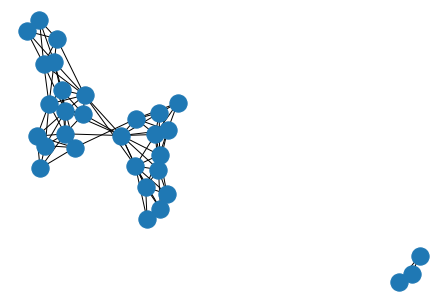

In [83]:
g = to_networkx(gp.d[0], to_undirected=True)
nx.draw(g)

In [ ]:
len(gp.d)

In [ ]:
len(gp.selection)

In [ ]:
gp.selection[10]['PDB'].iloc[0]

In [ ]:
len(gp.edges[0])

In [ ]:
gp.d[0]

In [ ]:
import networkx as nx
from torch_geometric.utils.convert import to_networkx

In [ ]:
g = to_networkx(gp.d[10], to_undirected=True)
nx.draw(g)

In [55]:
gp.p.table

,uniprot(gene),receptor family,Cl.,Species,Method,PDB,Resolution,Preferred Chain,State,Degree active %,...,Gq/11_x,G12/13_x,Gs_y,Gi/o_y,Gq/11_y,G12/13_y,Gs,Gi/o,Gq/11,G12/13
0,OXYR,Vasopressinandoxytocin,A(Rhodopsin),Human,X-ray,6TPK,3.2,A,Inactive,24,...,8.3,0.0,0.0,7.2,8.3,0.0,0.0,7.2,8.3,0.0
1,CNR2,Cannabinoid,A(Rhodopsin),Human,X-ray,5ZTY,2.8,A,Inactive,6,...,0.0,0.0,0.0,8.9,0.0,0.0,0.0,8.9,0.0,0.0
2,PE2R3,Prostanoid,A(Rhodopsin),Human,X-ray,6AK3,2.9,B,Active,83,...,8.7,10.0,0.0,9.8,8.7,10.0,0.0,9.8,8.7,10.0
3,5HT1B,5-Hydroxytryptamine,A(Rhodopsin),Human,cryo-EM,6G79,3.8,S,Active,100,...,6.7,0.0,0.0,8.9,6.7,0.0,0.0,8.9,6.7,0.0
4,OPRD,Opioid,A(Rhodopsin),Human,X-ray,4N6H,1.8,A,Inactive,7,...,7.9,0.0,0.0,9.7,7.9,0.0,0.0,9.7,7.9,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
363,CCKAR,Cholecystokinin,A(Rhodopsin),Human,cryo-EM,7MBX,2.0,R,Active,100,...,11.1,10.4,10.4,11.0,11.1,10.4,10.4,11.0,11.1,10.4
364,GLP1R,Glucagon,B1(Secretin),Human,cryo-EM,7LCJ,2.8,R,Active,100,...,0.0,0.0,10.6,0.0,0.0,0.0,10.6,0.0,0.0,0.0
365,ADA2A,Adrenoceptors,A(Rhodopsin),Human,X-ray,6KUX,2.7,A,Inactive,1,...,6.2,6.3,5.4,9.5,6.2,6.3,5.4,9.5,6.2,6.3
366,GLP1R,Glucagon,B1(Secretin),Human,cryo-EM,7LCK,3.2,R,Active,100,...,0.0,0.0,10.6,0.0,0.0,0.0,10.6,0.0,0.0,0.0


In [ ]:
len(gp.d)

In [ ]:
g = to_networkx(gp.d[10], to_undirected=True)
nx.draw(g)

In [ ]:
g = to_networkx(gp.d[10], to_undirected=True)
nx.draw(g)

In [ ]:
len(gp.d)

In [ ]:
g = to_networkx(gp.d[10], to_undirected=True)
nx.draw(g)

In [ ]:
len(gp.d)

In [ ]:
len(gp.selection)

In [ ]:
gp.selection[10]['PDB'].iloc[0]